<a href="https://colab.research.google.com/github/Freesoul-tech/Louis-Mahobe/blob/main/Linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**
Linear Regression**

In [11]:
import pandas as pd
from sklearn.metrics import mean_squared_error

def compare_models(models_info, X_test, y_test):

    records = []

    for model, label in models_info:
        y_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_pred)
        train_loss = model.loss[-1]
        val_loss = model.val_loss[-1] if np.any(model.val_loss) else None

        records.append({
            "Description": label,
            "Training Loss": train_loss,
            "Validation Loss": val_loss,
            "Test MSE": test_mse
        })

    return pd.DataFrame(records)

    models_info = [
    (model_with_bias, "Linear with Bias"),
    (model_no_bias, "Linear without Bias"),
    (model_poly2, "Polynomial Degree 2"),
    # Add more if needed
]

    results_df = compare_models(models_info, X_test, y_test)
    print(results_df)



In [12]:
# Generate dummy data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

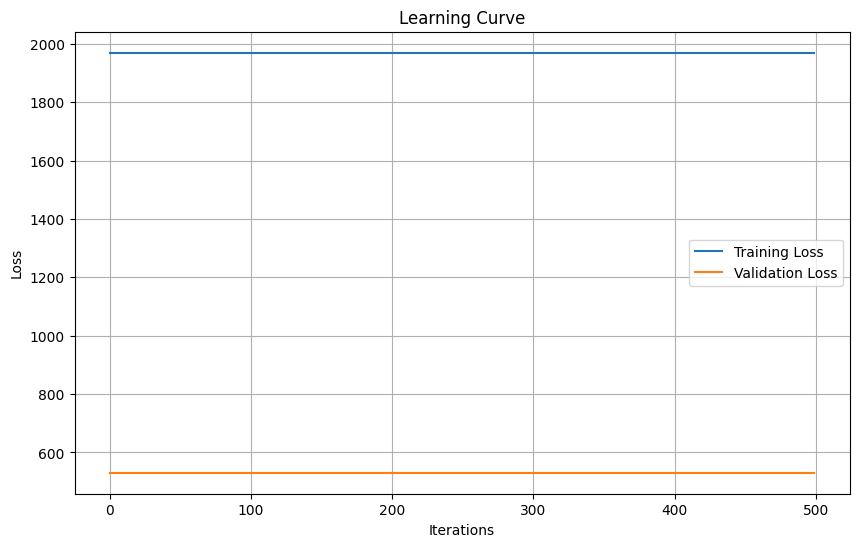

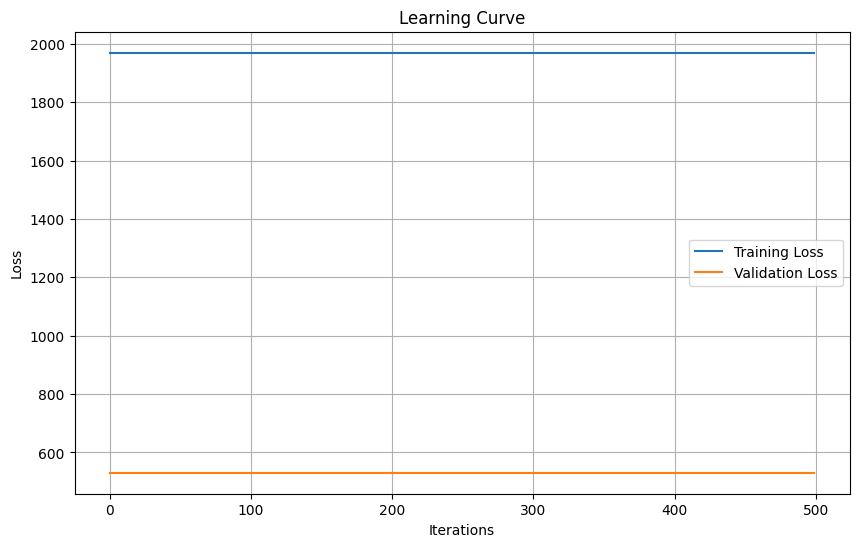

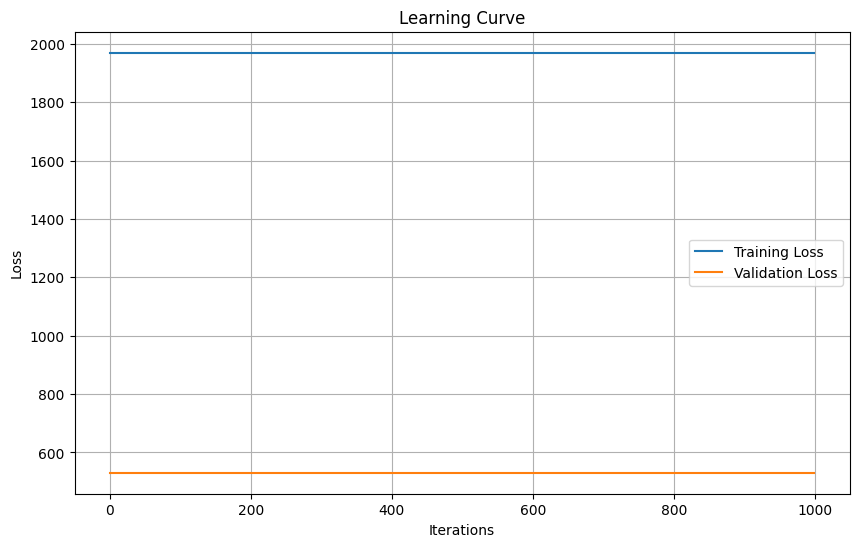

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

class ScratchLinearRegression:
    def __init__(self, num_iter, lr, no_bias, verbose):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None

    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    def _gradient_descent(self, X, error):
         gradient = np.dot(X.T, error).reshape(-1) / X.shape[0]


    def fit(self, X, y, X_val=None, y_val=None):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)

            self.loss[i] = self._objective_function(y_pred, y)
            if X_val is not None and y_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._objective_function(y_val_pred, y_val)

            if self.verbose:
                print(f"Iteration {i+1}, Training Loss: {self.loss[i]:.4f}")

    def predict(self, X):
        if not self.no_bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._linear_hypothesis(X)


    def _objective_function(self, y_pred, y):
        return np.sum((y_pred - y) ** 2) / (2 * len(y))

    def MSE(y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def plot_learning_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.iter), self.loss, label='Training Loss')
        if np.any(self.val_loss):  # Only plot if validation loss was recorded
            plt.plot(range(self.iter), self.val_loss, label='Validation Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Learning Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

# Model training and plotting learning curves
# With bias term
model_with_bias = ScratchLinearRegression(num_iter=500, lr=0.01, no_bias=False, verbose=False)
model_with_bias.fit(X_train, y_train, X_val, y_val)
model_with_bias.plot_learning_curve()

# Without bias term
model_no_bias = ScratchLinearRegression(num_iter=500, lr=0.01, no_bias=True, verbose=False)
model_no_bias.fit(X_train, y_train, X_val, y_val)
model_no_bias.plot_learning_curve()

# Squared features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_sq = poly.fit_transform(X_train)
X_val_sq = poly.transform(X_val)

model_poly2 = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
model_poly2.fit(X_train_sq, y_train, X_val_sq, y_val)
model_poly2.plot_learning_curve()